In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed May 24 16:20:13 2023

@author: williamnehemia
"""

import os

import tensorflow as tf

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ConvNeXtXLarge, EfficientNetV2L, ConvNeXtBase, ConvNeXtTiny, EfficientNetV2B0, InceptionResNetV2, ResNet152V2
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dense, Dropout, Concatenate

base_dir = '/Users/williamnehemia/Documents/Bangkit-Course/download_image/Fast Food Classification V2'
#base_dir = '/Users/williamnehemia/Documents/Bangkit-Course/download_image/Fast_food_classification'
train_dir = os.path.join(base_dir, 'Train')
val_dir = os.path.join(base_dir, 'Valid')
test_dir = os.path.join(base_dir, 'Test')


def create_model():
    IMAGE_SIZE = [224, 224]

    input_layer = tf.keras.Input(shape=IMAGE_SIZE + [3])

    base1 = InceptionResNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
    for layer in base1.layers:
        layer.trainable = False

    x1 = base1(input_layer)
    x1 = GlobalAveragePooling2D()(x1)  # Add global average pooling layer for consistent output shape

    base2 = ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
    for layer in base2.layers:
        layer.trainable = False

    x2 = base2(input_layer)
    x2 = GlobalAveragePooling2D()(x2)  # Add global average pooling layer for consistent output shape

    # Merge the outputs of the two models
    merged = Concatenate()([x1, x2])

    x = Dense(1024, activation='relu')(merged)
    x = Dropout(0.2)(x)

    prediction = Dense(9, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=prediction)

    
    model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-3),
    metrics=['accuracy']
    )



    return model

  
  
  


# Create new model
model_for_aug = create_model()

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')



test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

val_generator =  val_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

# Flow validation images in batches of 20 using test_datagen generator
test = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

val = val_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')
batch_size = 20
# Train the new model
history_with_aug = model_for_aug.fit(
      train_generator,
      steps_per_epoch=len(train_generator)//batch_size,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=val_generator,
      validation_steps=100, #len(val_generator)//batch_size,  # 1000 images = batch_size * steps
      verbose=2)





2023-05-28 10:03:30.728152: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 9747 images belonging to 9 classes.
Found 3172 images belonging to 9 classes.
Found 1670 images belonging to 9 classes.
Found 3172 images belonging to 9 classes.
Epoch 1/100


2023-05-28 10:03:47.964204: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-05-28 10:05:05.332542: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


24/24 - 550s - loss: 10.0044 - accuracy: 0.3833 - val_loss: 1.7375 - val_accuracy: 0.5675 - 550s/epoch - 23s/step
Epoch 2/100


/Users/williamnehemia/anaconda3/envs/Capstone/lib/python3.11/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


24/24 - 588s - loss: 1.2999 - accuracy: 0.6146 - val_loss: 1.2150 - val_accuracy: 0.6695 - 588s/epoch - 25s/step
Epoch 3/100
24/24 - 591s - loss: 1.1311 - accuracy: 0.6438 - val_loss: 1.2391 - val_accuracy: 0.6325 - 591s/epoch - 25s/step
Epoch 4/100
24/24 - 608s - loss: 0.9514 - accuracy: 0.6938 - val_loss: 1.1319 - val_accuracy: 0.6650 - 608s/epoch - 25s/step
Epoch 5/100
24/24 - 618s - loss: 0.9379 - accuracy: 0.7125 - val_loss: 1.0441 - val_accuracy: 0.6905 - 618s/epoch - 26s/step
Epoch 6/100
24/24 - 611s - loss: 0.9564 - accuracy: 0.6979 - val_loss: 1.0998 - val_accuracy: 0.6845 - 611s/epoch - 25s/step
Epoch 7/100
24/24 - 604s - loss: 0.9224 - accuracy: 0.7250 - val_loss: 1.0332 - val_accuracy: 0.6985 - 604s/epoch - 25s/step
Epoch 8/100
24/24 - 618s - loss: 0.9279 - accuracy: 0.7000 - val_loss: 1.2542 - val_accuracy: 0.6380 - 618s/epoch - 26s/step
Epoch 9/100
24/24 - 611s - loss: 0.8917 - accuracy: 0.7083 - val_loss: 1.0639 - val_accuracy: 0.7000 - 611s/epoch - 25s/step
Epoch 10/100

Epoch 68/100
24/24 - 593s - loss: 0.7541 - accuracy: 0.7396 - val_loss: 0.9414 - val_accuracy: 0.7455 - 593s/epoch - 25s/step
Epoch 69/100
24/24 - 568s - loss: 0.6767 - accuracy: 0.7500 - val_loss: 0.9364 - val_accuracy: 0.7360 - 568s/epoch - 24s/step
Epoch 70/100
24/24 - 572s - loss: 0.7010 - accuracy: 0.7625 - val_loss: 0.9454 - val_accuracy: 0.7260 - 572s/epoch - 24s/step
Epoch 71/100
24/24 - 514s - loss: 0.7071 - accuracy: 0.7688 - val_loss: 1.0148 - val_accuracy: 0.7215 - 514s/epoch - 21s/step
Epoch 72/100
24/24 - 598s - loss: 0.6932 - accuracy: 0.7688 - val_loss: 0.9837 - val_accuracy: 0.7380 - 598s/epoch - 25s/step
Epoch 73/100
24/24 - 516s - loss: 0.8071 - accuracy: 0.7366 - val_loss: 0.9528 - val_accuracy: 0.7245 - 516s/epoch - 22s/step
Epoch 74/100
24/24 - 554s - loss: 0.7750 - accuracy: 0.7604 - val_loss: 0.9523 - val_accuracy: 0.7305 - 554s/epoch - 23s/step
Epoch 75/100
24/24 - 531s - loss: 0.6349 - accuracy: 0.7979 - val_loss: 0.9575 - val_accuracy: 0.7450 - 531s/epoch - 2

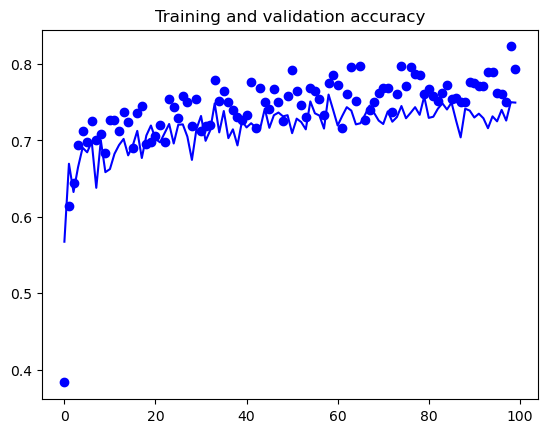

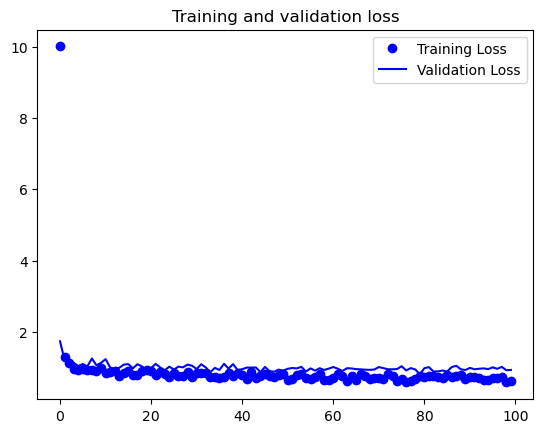

In [2]:


import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()
  
  
plot_loss_acc(history_with_aug)